In [ ]:
import cv2
import tensorflow as tf
import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, Activation
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
samoyed_data = os.listdir("/content/drive/MyDrive/neiron lab/Latysheva/lab4/img2/samoyed")
doberman_data = os.listdir("/content/drive/MyDrive/neiron lab/Latysheva/lab4/img2/doberman")
dingo_data = os.listdir("/content/drive/MyDrive/neiron lab/Latysheva/lab4/img2/dingo")
print(samoyed_data[:10])
print(doberman_data[:10])
print(dingo_data[:10])

['n02111889_1020.jpg', 'n02111889_12037.jpg', 'n02111889_10206.jpg', 'n02111889_10987.jpg', 'n02111889_10950.jpg', 'n02111889_108.jpg', 'n02111889_11502.jpg', 'n02111889_12045.jpg', 'n02111889_1019.jpg', 'n02111889_11729.jpg']
['n02107142_12749.jpg', 'n02107142_10647.jpg', 'n02107142_13677.jpg', 'n02107142_10009.jpg', 'n02107142_10070.jpg', 'n02107142_11226.jpg', 'n02107142_13356.jpg', 'n02107142_1306.jpg', 'n02107142_11042.jpg', 'n02107142_1251.jpg']
['n02115641_10506.jpg', 'n02115641_10604.jpg', 'n02115641_10561.jpg', 'n02115641_10286.jpg', 'n02115641_10570.jpg', 'n02115641_10395.jpg', 'n02115641_10021.jpg', 'n02115641_10261.jpg', 'n02115641_10992.jpg', 'n02115641_1674.jpg']


In [ ]:
def show_img(path, img_data, count, title_name):
  plt.figure(figsize = (12, 12))
  for i in range(6):
    plt.subplot(1, 6, i+1)
    img = cv2.imread(path + img_data[i + count], cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(title_name)
    plt.tight_layout
  plt.show()

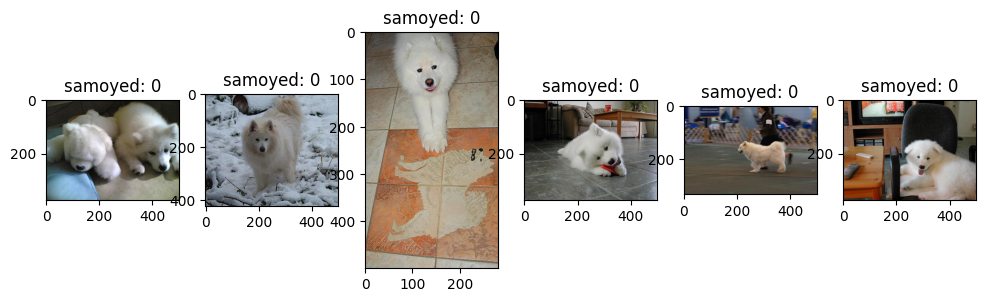

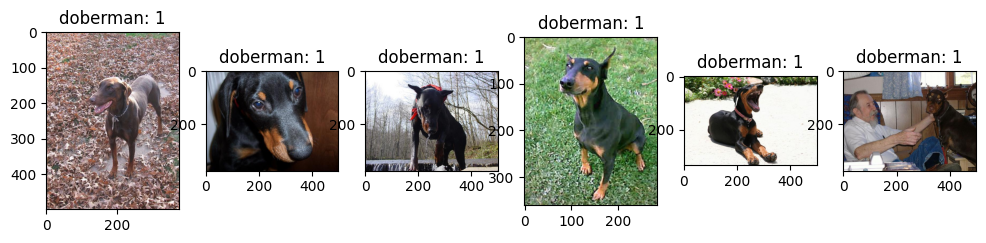

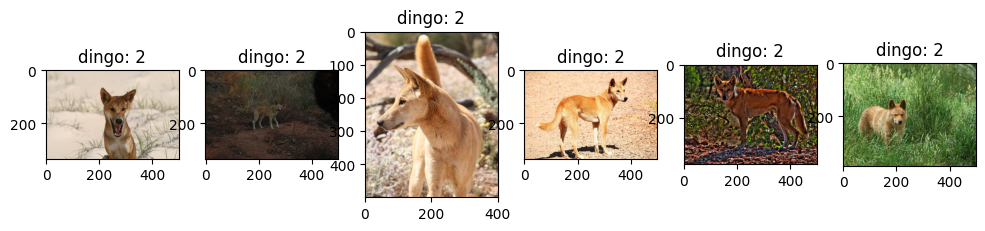

In [ ]:
show_img("/content/drive/MyDrive/neiron lab/Latysheva/lab4/img2/samoyed/", samoyed_data, 0, "samoyed: 0")
show_img("/content/drive/MyDrive/neiron lab/Latysheva/lab4/img2/doberman/", doberman_data, 0, "doberman: 1")
show_img("/content/drive/MyDrive/neiron lab/Latysheva/lab4/img2/dingo/", dingo_data, 0, "dingo: 2")

In [ ]:
def add_img(data, labels, count, images, path, app):
  for img in images:
    if count == 100:
      count = 0
      break
    img_read = cv2.imread(path + img)
    img_read = cv2.cvtColor(img_read, cv2.COLOR_BGR2RGB)
    img_resize = cv2.resize(img_read, (224, 224))
    data.append(img_resize)
    labels.append(app)
    count+=1
    if count % 50 == 0:
      print(count)
  return data, labels, count

In [ ]:
data = []
labels = []
count = 0

data, labels, count = add_img(data, labels, count, samoyed_data, "/content/drive/MyDrive/neiron lab/Latysheva/lab4/img2/samoyed/", 0)
data, labels, count = add_img(data, labels, count, doberman_data, "/content/drive/MyDrive/neiron lab/Latysheva/lab4/img2/doberman/", 1)
data, labels, count = add_img(data, labels, count, dingo_data, "/content/drive/MyDrive/neiron lab/Latysheva/lab4/img2/dingo/", 2)

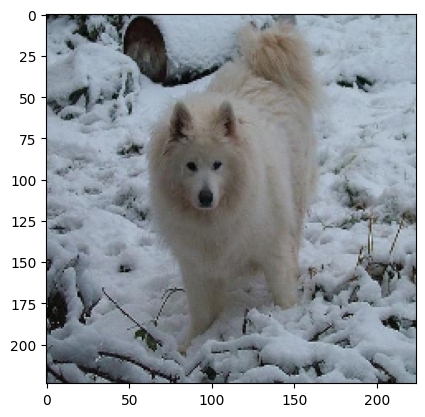

In [ ]:
plt.imshow(data[1])
plt.show()

In [ ]:
x_trn, x_tst, y_trn, y_tst = train_test_split(data, labels, test_size = 0.2, shuffle=True, random_state = 42)

In [ ]:
x_train = np.array(x_trn, np.float32)/ 255.
x_test = np.array(x_tst, np.float32)/ 255.

y_train = np.array(y_trn)
y_test = np.array(y_tst)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(240, 224, 224, 3)
(240,)


In [ ]:
efficie_net = EfficientNetB0(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

efficie_net.trainable = False

efficie_net.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['normalization[0][0

In [ ]:
def create_model(n):
  model = Sequential()
  model.add(efficie_net)
  model.add(Flatten())
  model.add(Dense(64))
  model.add(Activation('relu'))
  if n == 1:
    model.add(Dropout(0.5))
    model.add(Dense(3))
    model.add(Activation('softmax'))

  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=0.01),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [ ]:
model = create_model(n = 1)

In [ ]:
history1 = model.fit(x_train, y_train, batch_size = 32, epochs = 10,
                    validation_data=(x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


8/8 [==============================] - 34s 3s/step - loss: 199.8098 - accuracy: 0.3167 - val_loss: 1.0988 - val_accuracy: 0.3667
Epoch 2/10
8/8 [==============================] - 24s 3s/step - loss: 19.6775 - accuracy: 0.3208 - val_loss: 1.1002 - val_accuracy: 0.3667
Epoch 3/10
8/8 [==============================] - 24s 3s/step - loss: 1.0991 - accuracy: 0.3208 - val_loss: 1.1015 - val_accuracy: 0.2667
Epoch 4/10
8/8 [==============================] - 24s 3s/step - loss: 8.6218 - accuracy: 0.3000 - val_loss: 1.1027 - val_accuracy: 0.2667
Epoch 5/10
8/8 [==============================] - 23s 3s/step - loss: 1.0997 - accuracy: 0.3500 - val_loss: 1.1024 - val_accuracy: 0.2667
Epoch 6/10
8/8 [==============================] - 24s 3s/step - loss: 7.2919 - accuracy: 0.3250 - val_loss: 1.0985 - val_accuracy: 0.3667
Epoch 7/10
8/8 [==============================] - 24s 3s/step - loss: 1.0995 - accuracy: 0.3250 - val_loss: 1.1008 - val_accuracy: 0.2667
Epoch 8/10
8/8 [==========================

In [ ]:
model2 = create_model(n = 0)

In [ ]:
history2 = model.fit(x_train, y_train, batch_size = 32, epochs = 10,
                    validation_data=(x_test, y_test))

Epoch 1/10
8/8 [==============================] - 29s 4s/step - loss: 1.0997 - accuracy: 0.3500 - val_loss: 1.1027 - val_accuracy: 0.2667
Epoch 2/10
8/8 [==============================] - 35s 5s/step - loss: 1.0989 - accuracy: 0.3500 - val_loss: 1.1019 - val_accuracy: 0.2667
Epoch 3/10
8/8 [==============================] - 24s 3s/step - loss: 1.0990 - accuracy: 0.3500 - val_loss: 1.1011 - val_accuracy: 0.2667
Epoch 4/10
8/8 [==============================] - 23s 3s/step - loss: 1.0992 - accuracy: 0.3500 - val_loss: 1.1029 - val_accuracy: 0.2667
Epoch 5/10
8/8 [==============================] - 23s 3s/step - loss: 1.0989 - accuracy: 0.3500 - val_loss: 1.1038 - val_accuracy: 0.2667
Epoch 6/10
8/8 [==============================] - 28s 4s/step - loss: 1.0993 - accuracy: 0.3500 - val_loss: 1.1037 - val_accuracy: 0.2667
Epoch 7/10
8/8 [==============================] - 28s 4s/step - loss: 1.0987 - accuracy: 0.3500 - val_loss: 1.1036 - val_accuracy: 0.2667
Epoch 8/10
8/8 [==================

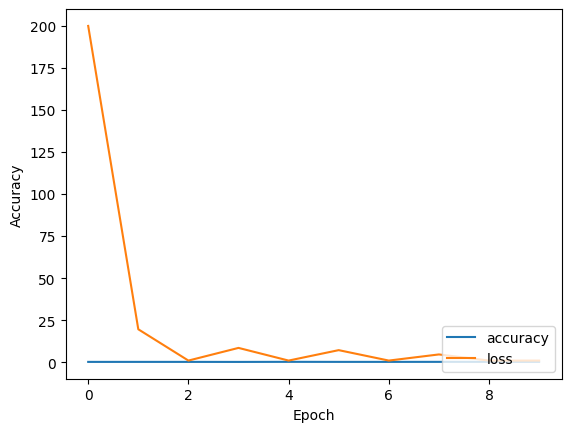

In [ ]:
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

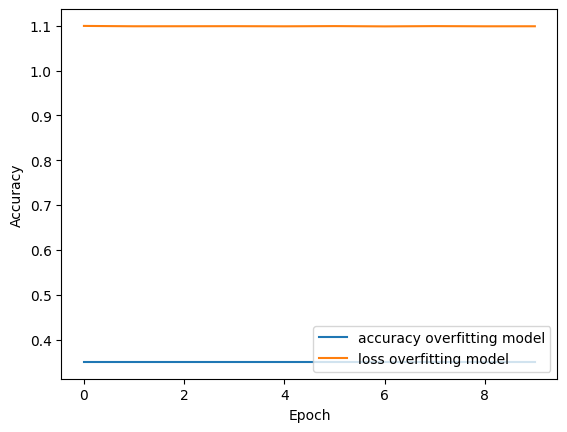

In [ ]:
plt.plot(history2.history['accuracy'], label='accuracy overfitting model')
plt.plot(history2.history['loss'], label='loss overfitting model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')